# Attendance Record

#### Stage 1: Import relevant modules

In [6]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#### Stage 2: Get relevant data from CWDatabase.db and format it to a list.

In [25]:
class ReadSQL:
    def __init__(self, database):
        self.database = database
        self.conn = sqlite3.connect(self.database)
        self.cur = self.conn.cursor()

    def queryColumnsToDataframe(self, studentID, modules, tables):
        dfs = []
        for i in range(len(modules)):
            sub_query1 = 'SELECT Week, ROUND(CAST(SUM(' + studentID + ')'
            sub_query2 = ' AS REAL)/COUNT(Week) * 100, 2) AS ' + modules[i]
            sub_query3 = ' FROM ' + tables[i][0] + ' a INNER JOIN ' + tables[i][1] + ' b'
            sub_query4 = ' ON a.Session_Number = b.Session_Number' + ' GROUP BY Week'
            query = sub_query1 + sub_query2 + sub_query3 + sub_query4
            # print(query)
            try:
                df = pd.read_sql_query(query, self.conn)
                dfs.append(df)
            except Exception as Error:
                print('This ID does not exist in the database please try again.')
        df = pd.concat(dfs, join = 'outer', axis = 1, sort = False)
        # print(dfs)
        return df

    def formatDataframe(self, df):
        df.drop('Week', axis = 1, inplace = True) # drop duplicate week columns
        weekNum = df.index + 1
        df.insert(loc = 0, column = 'WeekNo', value = weekNum) # insert new week column at the start
        df.rename(
            columns = {
                'COA111':'COA111 (%)', 
                'COA122':'COA122 (%)'
            },
            inplace = True
        )
        return df

    def closeDatabase(self):
        self.conn.close() 
        print('\nThe sqlite connection is now closed.')


The sqlite connection is now closed.


# Testing

### Stage 1: Given student id return the weekly attendance of the student

In [ ]:
sid = str(input('Please enter a student ID i.e., \'Student123\': '))
sid = sid.strip()

test = ReadSQL(database='CWDatabase.db')
modules = ['COA111', 'COA122']
sessions = [['COA111Sessions', 'COA111Transposed'], ['COA122Sessions', 'COA122Transposed']]

df = test.queryColumnsToDataframe(sid, modules, sessions)
weeklyAttendance = test.formatDataframe(df)
test.closeDatabase()

### Stage 2: Plot a bar chart of the student attendance

The weekly attendance record of Student ID 11:


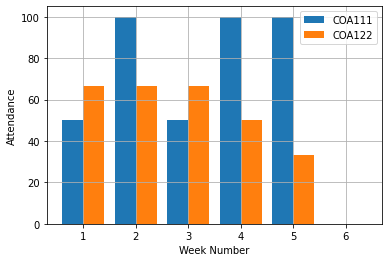

In [27]:
week = np.array(weeklyAttendance['WeekNo'])

plt.bar(week- 0.2, weeklyAttendance['COA111 (%)'], width = 0.4, label = 'COA111') # w/o specifying colour
plt.bar(week + 0.2, weeklyAttendance['COA122 (%)'], width = 0.4, label = 'COA122')
plt.xlabel('Week Number')
plt.ylabel('Attendance')

# show the legend, grid and plot
plt.legend(loc = 'upper right')
plt.grid()

print('The weekly attendance record of Student ID %s:'%sid[7:])
plt.show()


In [28]:
weeklyAttendance

,WeekNo,COA111 (%),COA122 (%)
0,1,50.0,66.67
1,2,100.0,66.67
2,3,50.0,66.67
3,4,100.0,50.00
4,5,100.0,33.33
5,6,NaN,0.00


#### Stage 4: Display list and graph to user. 

In [4]:
# 1.3 https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas